# Unsupervised Machine Learning (Team_JM1 Project Solution)

### © Explore Data Science Academy

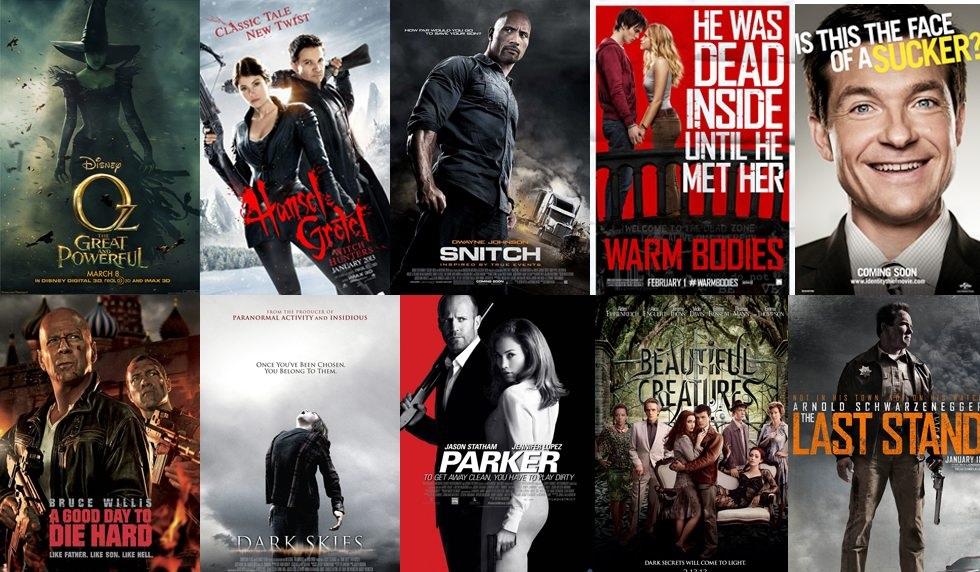

<br>
<br>

## Overview: Movie Recommendation System 2022

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.


The objective of this project was to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution in this project has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.


Recommender Systems are a type of information filtering system as they improve the quality of search results and provides items that are more relevant to the search item or are related to the search history of the user.  

Almost every major tech company has applied recommender systems in some form: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay and Facebook uses it to recommend pages to like and people to follow. Furthermore, companies like Netflix and Spotify depend on the effectiveness of their recommendation engines for the success of their business.

<br>
<br>

<a id="cont"></a>

## Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>     

<a href=#eight>8. Conclusion</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [1]:
# Data manipulation
import numpy as np 
import pandas as pd   
import re

# Data visualization
import matplotlib
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
sns.set(style="whitegrid")
sns.set_style("dark")

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Building recommender systems
from sklearn.metrics.pairwise import cosine_similarity
import gensim
from gensim.matutils import cossim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import pearsonr
from sklearn.cluster import KMeans

# For Unsupervised Model Building
import surprise
from surprise import Reader, Dataset, SVD
from surprise import NormalPredictor, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import KNNBaseline, BaselineOnly, SVDpp, NMF, SlopeOne, CoClustering

# Import time to measure algorithm runtime 
from time import time
from datetime import datetime

# Turn off or ignore minor warnings that may pop-up while executing codes.
import warnings 
warnings.filterwarnings('ignore')

# Garbage Collector
import gc

C:\Users\yinka\AppData\Local\Temp\ipykernel_3796\2150609270.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-pastel')


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



### Movies Dataset from MovieLens Database and IMDB

The given datasets consist of 7 csv files with informations of movies and several million 5-star ratings obtained from users of the online MovieLens movie recommendation service.

    genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
    genome_tags.csv - user assigned tags for genome-related scores
    imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
    links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
    tags.csv - User assigned for the movies within the dataset.
    test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
    train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

<br>

Two datasets was used majorly in this project,namely;

- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data. This dataset was used for the Kaggle submission in the competition in which all teams were required to participate
<br>

- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data. This dataset was used for the training and evaluation of our machine learning models

### Loading Datasets

In [2]:
genome_scores_df = pd.read_csv('resources/data/genome_scores.csv')
genome_scores_df.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [3]:
genome_tags_df = pd.read_csv('resources/data/genome_tags.csv')
genome_tags_df.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [4]:
imdb_data_df = pd.read_csv('resources/data/imdb_data.csv')
imdb_data_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [5]:
links_df = pd.read_csv('resources/data/links.csv')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
movies_df = pd.read_csv('resources/data/movies.csv')
movies_df.tail()

,movieId,title,genres
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama


In [7]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [61]:
ratings_df = pd.read_csv('resources/data/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [8]:
sample_submission_df = pd.read_csv('resources/data/sample_submission.csv')
sample_submission_df.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [9]:
tags_df = pd.read_csv('resources/data/tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [10]:
train_df = pd.read_csv('resources/data/train.csv')
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [11]:
test_df = pd.read_csv('resources/data/test.csv')
test_df.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [12]:
movies_df.info()

#checking the shape
k, l = movies_df.shape
print(f'movies_df contains {k} rows and {l} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
movies_df contains 62423 rows and 3 columns


In [13]:
train_df.info()

#checking the shape
k, l = train_df.shape
print(f'train_df contains {k} rows and {l} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB
train_df contains 10000038 rows and 4 columns


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


 - In this section, we will perform some indepth analysis on our datasets with the use of visualizations.

 - We will also look at ratings distribution of the data which will be illustrated using graphs.

#### Size of the datasets

In [14]:
# Check the shape/sizes of the data sets
"""" 
Creating a DataFrame which tells the shape of each of our datasets
"""

# List Names of Data sets
Df_names = ['Movies Data', 'IMDB Data', 'Tags Data', 'Genome Scores_Data', 'Genome Tags Data', 'Train Data', ]

# Generate a list of each data size
observations = [movies_df.shape[0], imdb_data_df.shape[0], tags_df.shape[0], 
                genome_scores_df.shape[0], genome_tags_df.shape[0], train_df.shape[0]]

columns = [movies_df.shape[1], imdb_data_df.shape[1], tags_df.shape[1], 
           genome_scores_df.shape[1], genome_tags_df.shape[1], train_df.shape[1]]

# Place & view result in Pandas DataFrame
size_df = pd.DataFrame(list(zip(Df_names, observations, columns)), columns=['Dataframe', 'Observations', 'Columns'])
size_df

,Dataframe,Observations,Columns
0,Movies Data,62423,3
1,IMDB Data,27278,6
2,Tags Data,1093360,4
3,Genome Scores_Data,15584448,3
4,Genome Tags Data,1128,2
5,Train Data,10000038,4


<br>

**Observations**

 - Each of these data sets have different number of observations. 
<br>

 - The `movieId` being present in all the data sets is an indication of relationships between all the datasets.    
<br>

- The train datasets that will be used for model training and validation contains over 10 million observations, which is a `BIG DATA` and could pose a challenge when training a machine learning model on such data on a local computer
<br>

- There are 10 million+ observations for training & validation (which could be a problem for systems with low computing power) which is a BIG DATA and this is a whole lot of Dataset to manipulate through.
<br>

- The Genome_score data with over 15 million observations will not be used during our machine learning model training and therefore is not much of a concern
<br>

- The `timestamp` found in `tags_df` and `train_df` isn't particularly useful for the recommendation algorithm building as the time a movie was rated has little or nothing to do with a user's preferences or the quality of a film. However, the timestamps can provide some meaningful insights in EDA.

We may have to reduce the dimesional of the dataset because of available computing power.

### Total number of users

The `train_df` has the highest number of observations and is the major dataset of this project and can therefore be used to obtain important statistics on the `users` and `movies`

In [15]:
# Number of users

unique_users = len(train_df['userId'].unique().tolist())
print(f'The total number of users are {unique_users}')

The total number of users are 162541


In [16]:
# Number of movies

unique_users = len(train_df['movieId'].unique().tolist())
print(f'The total number of movies are {unique_users}')

The total number of movies are 48213


<br>

## Ratings

### Lowest, Average and Highest rating

In [17]:
# minimum and maximum ratings

min_rating = train_df.rating.min()
avg_rating = round(train_df.rating.mean(), 1)
max_rating = train_df.rating.max()
print(f'Lowest rating: {min_rating}')
print(f'Average rating: {avg_rating}')
print(f'Highest rating: {max_rating}')

Lowest rating: 0.5
Average rating: 3.5
Highest rating: 5.0


### Distributions of ratings

In [18]:
# Creating a class distribution in a dataframe
ratings_dist = pd.DataFrame(list(train_df['rating'].value_counts()),
                          index=train_df['rating'].unique(),
                          columns=['Rating count'])

ratings_dist

,Rating count
4.0,2652977
4.5,1959759
5.0,1445230
2.0,1270642
3.0,880516
1.0,656821
3.5,505578
2.5,311213
0.5,159731
1.5,157571


**Visualization of the Ratings Distribution**

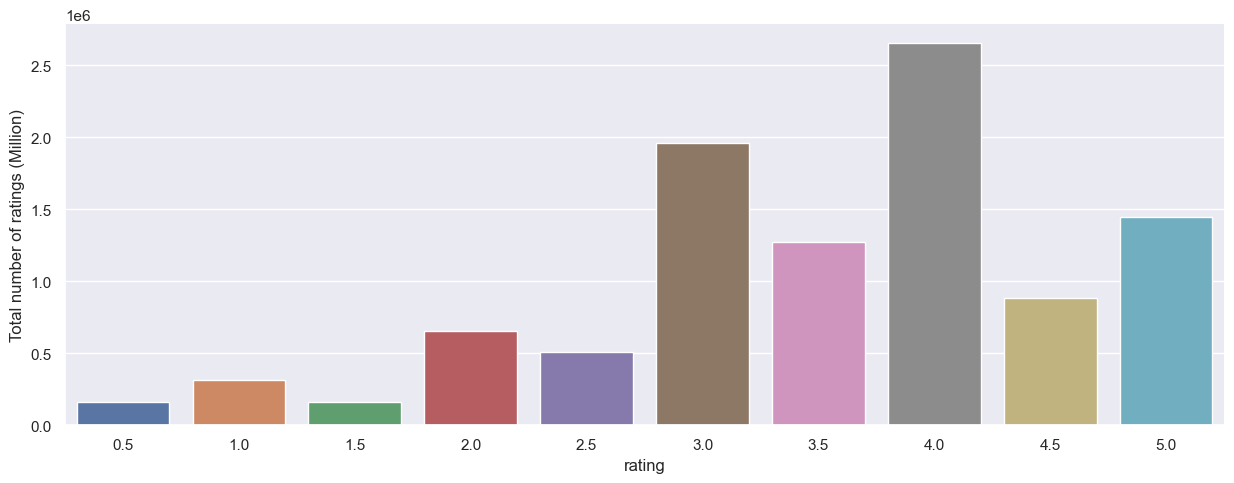

In [19]:
# Let's Visualise the Distribution of Rating in our Actual Train Data

with sns.axes_style('darkgrid'):
    g = sns.catplot(x="rating", data=train_df, aspect=2.5, kind='count')
    g.set_ylabels("Total number of ratings (Million)");

<br>

#### Total Number of Ratings and Average Ratings

In [20]:
print (f'Total Number of ratings in train_df: {train_df.shape[0]}')

print (f'\nAverage rating in train_df: {round(np.mean(train_df["rating"]), 1)}')

Total Number of ratings in train_df: 10000038

Average rating in train_df: 3.5


<br>

**Cleaning up `movies_df` features**

In [21]:
# Convert data types to strings for string handling
movies_df['title'] = movies_df.title.astype(str)
movies_df['genres'] = movies_df.genres.astype(str)

# Discarding the pipes between the genres 
movies_df['genres'] = movies_df['genres'].map(lambda x: x.lower().split('|'))
movies_df['genres'] = movies_df['genres'].apply(lambda x: " ".join(x))

# Extracting the release year from the titles
def get_release_dates(title):
    sub = title[-5:-1]
    year = int(sub) if sub.isdigit() else 9999    
    return year

# Creating the release year by extracting the release year from the movie title
movies_df['release_year'] = movies_df['title'].apply(get_release_dates)

# removing the year from the titles
#movies_df['title'] = movies_df['title'].map(lambda x: str(x)[:-6])

movies_df.head()

,movieId,title,genres,release_year
0,1,Toy Story (1995),adventure animation children comedy fantasy,1995
1,2,Jumanji (1995),adventure children fantasy,1995
2,3,Grumpier Old Men (1995),comedy romance,1995
3,4,Waiting to Exhale (1995),comedy drama romance,1995
4,5,Father of the Bride Part II (1995),comedy,1995


<br>

For ease of analysis of the data, the train dataframe will be merged with the movies dataframe based on the `movieId`.

In [22]:
# adding movie titles and genres to train_df
train_df = train_df.merge(movies_df[['movieId', 'title', 'genres']], on='movieId', how='left')

#train_df.drop(train_df[["title_x","genres_x", "title_y","genres_y"]], axis=1, inplace=True) 
train_df.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),comedy crime drama thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,action comedy sci-fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),adventure comedy crime
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,drama horror mystery thriller


<br>

**It is imperative to check for the persence of Null values**

In [23]:
# checking to see if there are null values
train_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

<br>

### Users that have rated movies the most

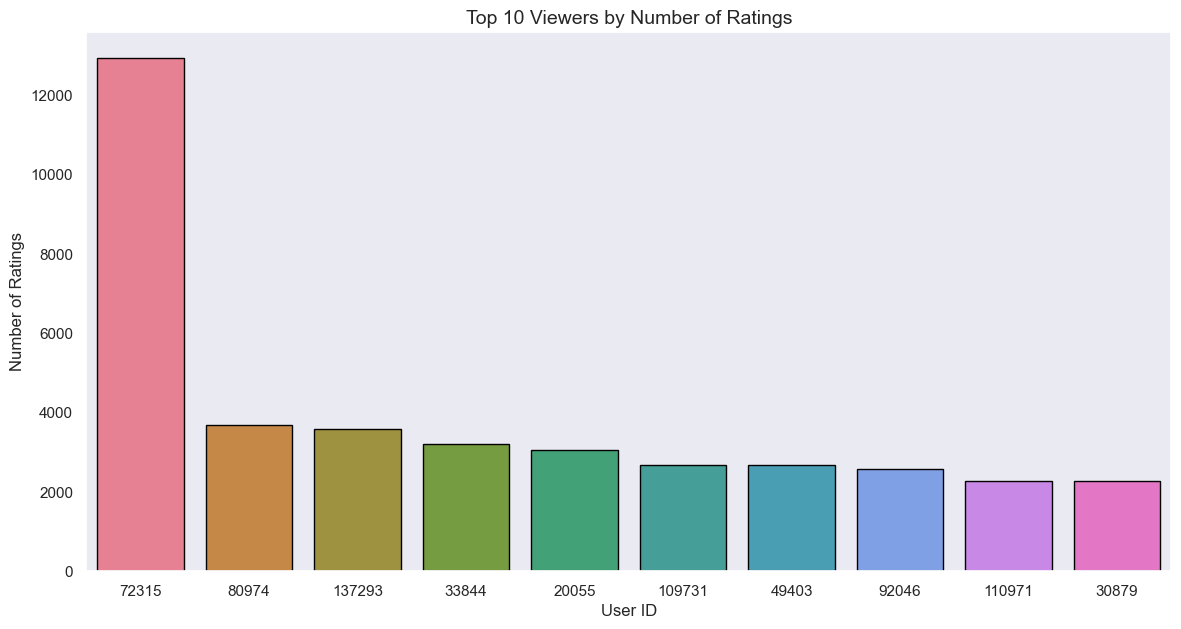

In [24]:
# Define Function that Reveals Users with Top Counts of Ratings
def user_ratings_count(df, n):
    plt.figure(figsize=(14,7))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette="husl", edgecolor="black")
   
    plt.title(f'Top {n} Viewers by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    plt.show()

user_ratings_count(train_df,10)

Our top movie rater(user 72315) has rated over 12,000 movies. It could be that this user rates any movie he/she watches. Or possibly a group of viewers sharing one userID.

### Most rated movies

In [25]:
train_df['title'].value_counts().index

Index(['Shawshank Redemption, The (1994)', 'Forrest Gump (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Jurassic Park (1993)', 'Schindler's List (1993)', 'Braveheart (1995)',
       'Fight Club (1999)',
       ...
       'The Mouth of the Wolf (2009)', 'Mann tut was Mann kann (2012)',
       'Butterfly (2004)', 'Self Made (2014)',
       'The Secret War of Harry Frigg (1968)',
       'The Green, Green Grass of Home (1982)', 'Bella Mafia (1997)',
       'Sniper (1932)',
       'Shinobi No Mono 3: Resurrection (Shin shinobi no mono) (1963)',
       'Elia Kazan: A Director's Journey (1995)'],
      dtype='object', length=48151)

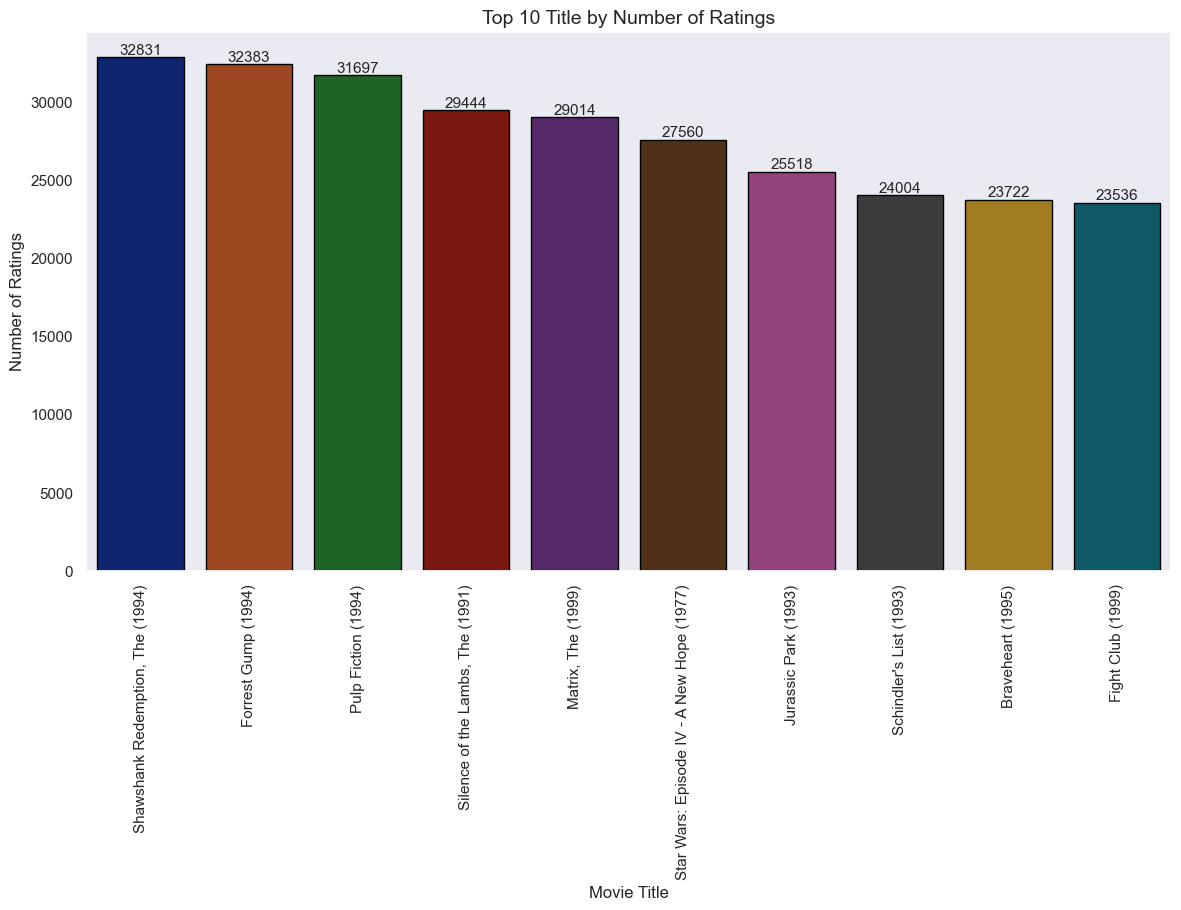

In [26]:
# A function to plot the top n movies with the highest number of ratings
def top_rating_plot(df,column, n):
    plt.figure(figsize=(14,7))
    
    # specifying the top n movies in terms of number of ratings
    data = df[str(column)].value_counts().head(n)
    
    # ploting the data
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='dark', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    
    # Title and axes labels
    plt.title(f'Top {n} {column.title()} by Number of Ratings', fontsize=14)
    plt.xlabel('Movie Title')
    plt.ylabel('Number of Ratings')
    plt.xticks(rotation=90)
    plt.show()

# Call Function to get the top 10
top_rating_plot(train_df,'title',10)

To be honest, it is a big suprise not to see the Titanic movie among the top 15 rated movies. But there are other popular movies like Star Wars, Lord of the Rings, Terminator. 

#### Popular movies by genre

In [27]:
movie_genres = pd.DataFrame(movies_df['genres'].str.split(" ").tolist(),
                      index=movies_df['movieId']).stack()
movie_genres = movie_genres.reset_index([0, 'movieId'])
movie_genres.columns = ['movieId', 'Genre']
movie_genres

,movieId,Genre
0,1,adventure
1,1,animation
2,1,children
3,1,comedy
4,1,fantasy
...,...,...
122426,209169,genres
122427,209169,listed)
122428,209171,action
122429,209171,adventure


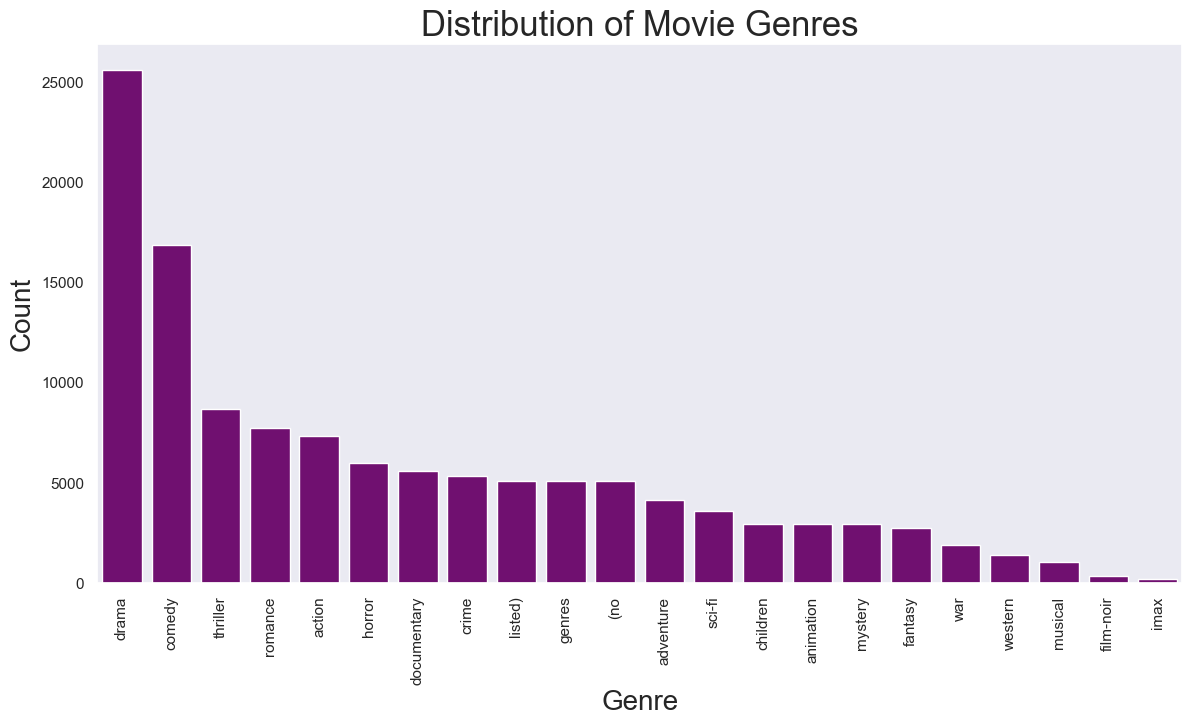

In [28]:
# Getting movies genres from 'genres' column (a movie may have more than one)
movie_genres = pd.DataFrame(movies_df['genres'].str.split(" ").tolist(),
                      index=movies_df['movieId']).stack()
movie_genres = movie_genres.reset_index([0, 'movieId'])
movie_genres.columns = ['movieId', 'Genre']

fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='Genre', data=movie_genres, color='purple',
              order=movie_genres['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

#### `Drama` is the most popular genre in our movies dataset.

<br>

**Movie Directors, Actors and Actresses**


Next, visualizing popular movie actors and directors using wordcloud.

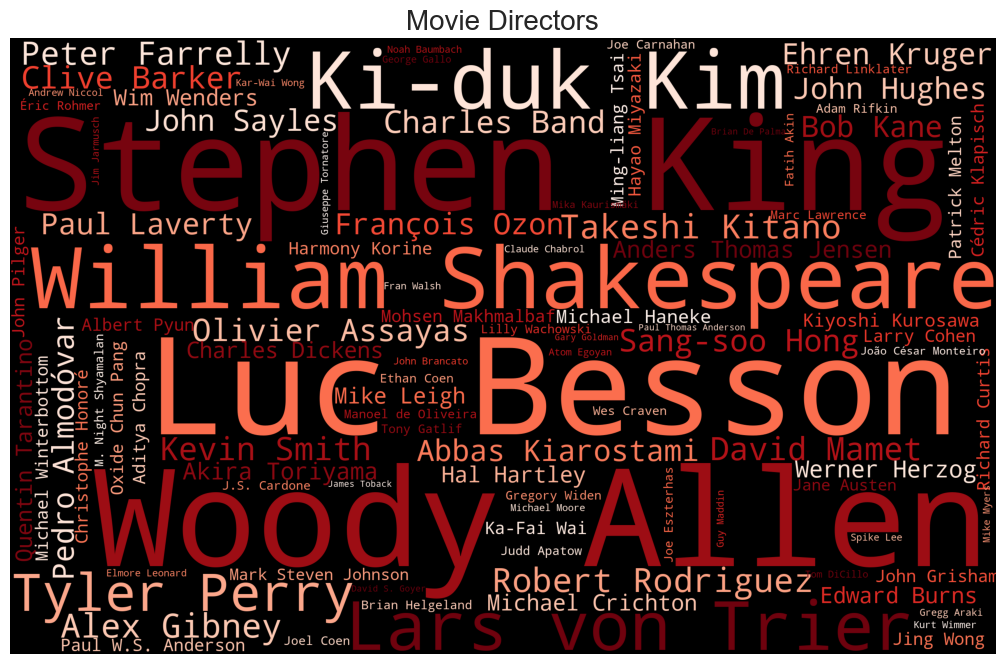

In [29]:
def wordcloud_generator(df, column):  
    keyword_counts = {}
    keyword_pair = []
    words = dict()
    
    # list of words that should be ignored
    ignore = ['nan', ' nan', 'nan ', 'See full summary' ]
    
    # Extract the unique keywords 
    for keyword in [keyword for keyword in df[column] if keyword not in ignore]:
        if keyword in keyword_counts.keys():
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1
     
    # Pair the keywords with their frequencies
    for word,word_freq in keyword_counts.items():
        keyword_pair.append((word,word_freq))
       
    # Sort the keywords accprding to their frequencies
    keyword_pair.sort(key = lambda x: x[1],reverse=True)
    
    # Make it wordcloud-ready
    for s in keyword_pair:
        words[s[0]] = s[1]
        
    # Create a wordcloud using the top 2000 keywords
    wordcloud = WordCloud(width=800, 
                          height=500, 
                          background_color='black', 
                          max_words=100,
                          max_font_size=110,
                          scale=3,
                          random_state=0,
                          colormap='Reds').generate_from_frequencies(words)

    return wordcloud 
# converting 'director' column to string
imdb_data_df['director'] = imdb_data_df.director.astype(str)

# Plot wordcloud
directors = wordcloud_generator(imdb_data_df, 'director')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(directors) 
plt.axis('off') 
plt.title('Movie Directors', fontsize=20)
plt.show()

<br>

In [30]:
imdb_data_df.title_cast.astype(str).apply(lambda x: "".join(x.lower() for x in x.split()))

0        tomhanks|timallen|donrickles|jimvarney|wallace...
1        robinwilliams|jonathanhyde|kirstendunst|bradle...
2        waltermatthau|jacklemmon|sophialoren|ann-margr...
3        whitneyhouston|angelabassett|lorettadevine|lel...
4        stevemartin|dianekeaton|martinshort|kimberlywi...
                               ...                        
27273    franzdinda|florianlukas|axelstein|kailasmahade...
27274    rickkavanian|axelstein|evahabermann|christophm...
27275    nam-gilkim|ye-jinson|hae-jinyoo|kyeong-yeongle...
27276    marttisuosalo|ilkkakoivula|vexisalmi|riittasal...
27277    sophielanecurtis|kellyreilly|grahamphillips|li...
Name: title_cast, Length: 27278, dtype: object

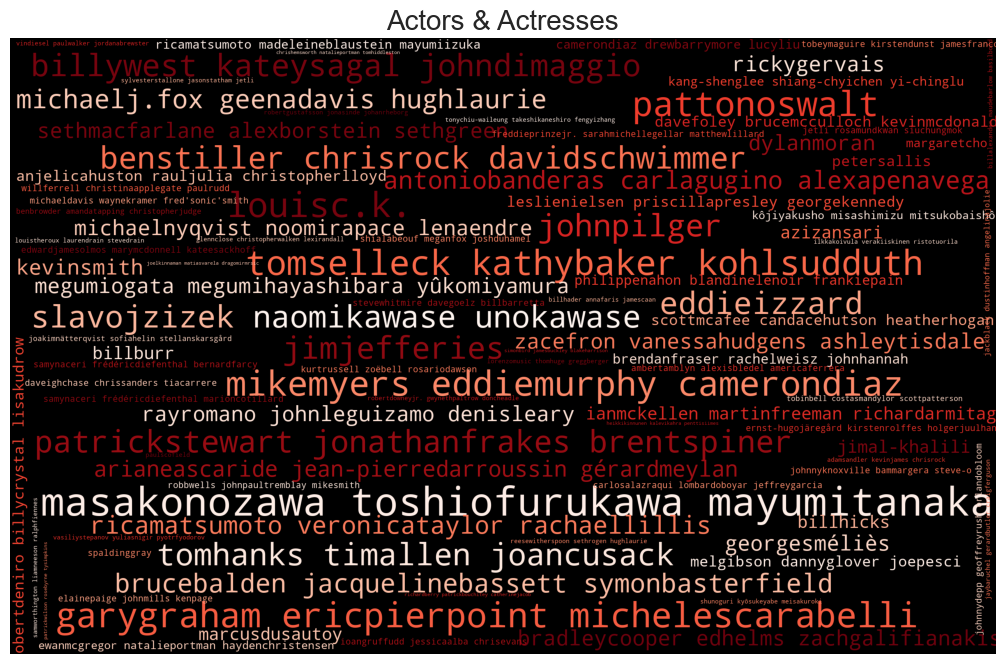

In [31]:
# Word cloud for Actors and Actresses

imdb_data_df['title_cast'] = imdb_data_df.title_cast.astype(str)
imdb_data_df['title_cast'] = imdb_data_df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))
imdb_data_df['title_cast'] = imdb_data_df['title_cast'].map(lambda x: x.split('|')[:3])
imdb_data_df['title_cast'] = imdb_data_df['title_cast'].apply(lambda x: " ".join(x))

# Plot wordcloud
actors = wordcloud_generator(imdb_data_df, 'title_cast')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(actors) 
plt.axis('off') 
plt.title('Actors & Actresses', fontsize=20)
plt.show()

<br>

### Date and Time

In [32]:
# From movie data, convert timestamp to datetime
train_df['date_time'] = train_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

# Extracting year, month, day-of-week
train_df['Year'] = train_df['date_time'].dt.year
train_df['Month'] = train_df['date_time'].dt.month
train_df['Day of Week'] = train_df['date_time'].dt.dayofweek

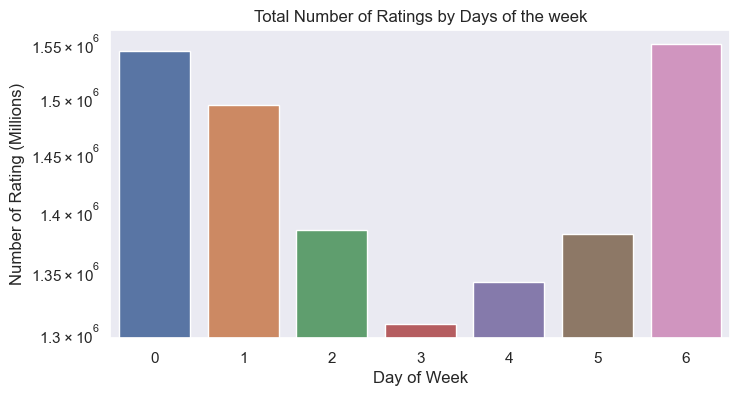

In [33]:
# Ratings by Day-of-Week
dow = train_df.groupby(['Day of Week'])['rating'].count().reset_index()

# creating a line Plot
fig, (ax) = plt.subplots(ncols=1, figsize=(8,4))
ax = sns.barplot(data=dow, x=dow['Day of Week'], y=dow['rating'])
plt.xlabel('Day of Week')
plt.ylabel('Number of Rating (Millions)')
plt.title('Total Number of Ratings by Days of the week')
ax.set(yscale="log")  # Use a logarithmic scale
plt.show()

**Most ratings, according to the plot from the datasets were given on Day 0 and 6 which represents the two days of the weekend, Sunday and Saturday, respectively.**

**This is intuitive as it can be said that people tend to have more spare time see movies on weekends.**

### Ratings by Month

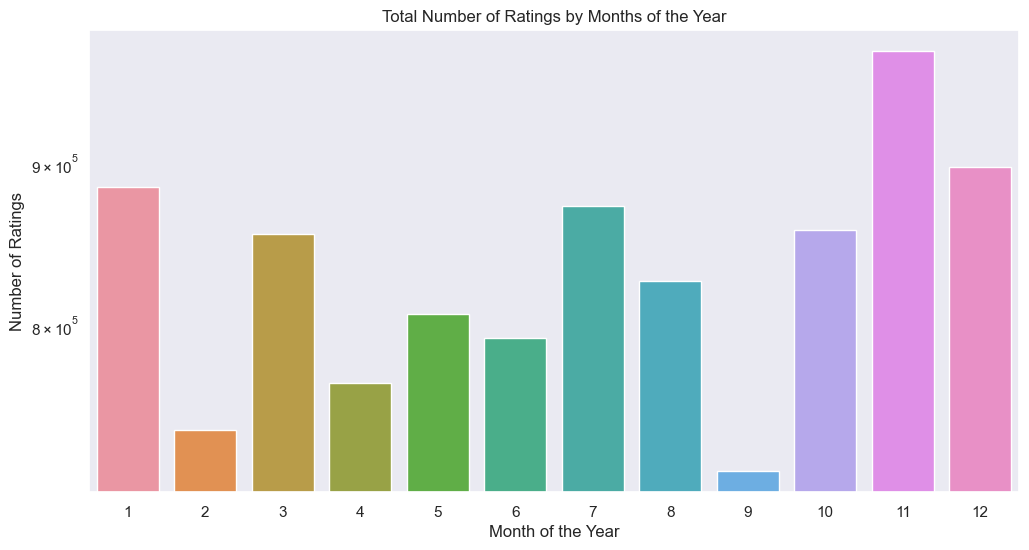

In [34]:
# Group rating by Month
moy = train_df.groupby(['Month'])['rating'].count().reset_index()
# creating a line Plot
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
ax = sns.barplot(data=moy, x=moy['Month'], y=moy['rating'])
ax.set(yscale="log")  # Use a logarithmic scale
plt.title('Total Number of Ratings by Days of the week')
plt.xlabel('Month of the Year') 
plt.ylabel('Number of Ratings')
plt.title('Total Number of Ratings by Months of the Year')
plt.show()

The winter months tend to have the most ratings which could be due to winter holidays

In [35]:
#  Reclaiming memory occupied by objects that are no longer referenced by the program using garbage collector
gc.collect()

16328

<br>

### Best and Worst Rated Movies

Using the average ratings, the top N Best and Worst rated movies are highlighted

In [36]:
# Create a new dataframe from the train_movies dataframe to get the average rating  
copied_train = train_df.copy()

# Drop any duplicated information 
copied_train.drop_duplicates(['title','genres'], inplace = True)

# Get the  avarage rating for each movie in the data 
total_ratings = train_df.groupby(['movieId','genres']).mean()['rating'].reset_index()

# Merge the the copied and the total_ratings to create a new data 
copied_train = copied_train.merge(total_ratings, on = 'movieId')

copied_train.drop(columns=['userId','rating_x','genres_y'],inplace=True) # Delete the duplicated columns

copied_train.rename(columns={'genres_x':'genres','rating_y':'rating'},inplace=True) # Rename the columns

copied_train.head()

,movieId,timestamp,title,genres,date_time,Year,Month,Day of Week,rating
0,57669,1518349992,In Bruges (2008),comedy crime drama thriller,2018-02-11 12:53:12,2018,2,6,3.889842
1,5,1206238739,Father of the Bride Part II (1995),comedy,2008-03-23 03:18:59,2008,3,6,3.059165
2,5459,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,action comedy sci-fi,2004-02-08 05:45:39,2004,2,6,3.004276
3,32296,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),adventure comedy crime,2015-02-04 10:36:05,2015,2,2,2.535714
4,366,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,drama horror mystery thriller,1996-05-29 14:17:17,1996,5,2,2.972609


<br>

### Number of times a each Movie has been rated

In [37]:
# Create a dataframe to check how many times a particular movie has been rated
user_rated = pd.DataFrame(train_df['movieId'].value_counts().reset_index())

user_rated.rename(columns = {'index':'movieId','movieId':'Number_of_ratings'},inplace = True) # Rename the columns 

copied_train = copied_train.merge(user_rated, on ='movieId') # Combine the train dataset with the User_rated data

# Filter the data 
copied_train = copied_train[copied_train['Number_of_ratings'] > 20] # Find the movies which have number of ratings for more than 20

copied_train = copied_train.sort_values('rating',ascending=False) # Sort the values by the rating feature

copied_train.head()

,movieId,timestamp,title,genres,date_time,Year,Month,Day of Week,rating,Number_of_ratings
5148,171011,1509581112,Planet Earth II (2016),documentary,2017-11-02 01:05:12,2017,11,3,4.517084,439
2660,159817,1485116192,Planet Earth (2006),documentary,2017-01-22 21:16:32,2017,1,6,4.473294,674
9966,171495,1562771572,Cosmos,(no genres listed),2019-07-10 16:12:52,2019,7,2,4.456897,116
59,318,1113025001,"Shawshank Redemption, The (1994)",crime drama,2005-04-09 06:36:41,2005,4,5,4.417624,32831
2168,170705,1572718813,Band of Brothers (2001),action drama war,2019-11-02 19:20:13,2019,11,5,4.399130,575


This dataframe was created to select those movies that were rated at least more than 5 times. A movie that is rated 5.0 just once or twice doesnt mean it is the best rated movie.

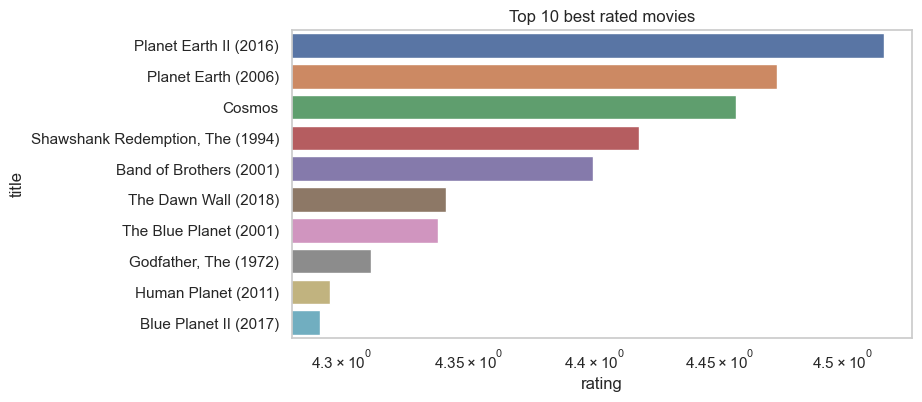

In [38]:
ax = sns.set(style="whitegrid", rc={'figure.figsize':(8,4)})
ax = sns.barplot(x=copied_train.rating.head(10), y=copied_train.title.head(10))
ax.set(xscale="log")
sns.color_palette()
plt.title('Top 10 best rated movies');

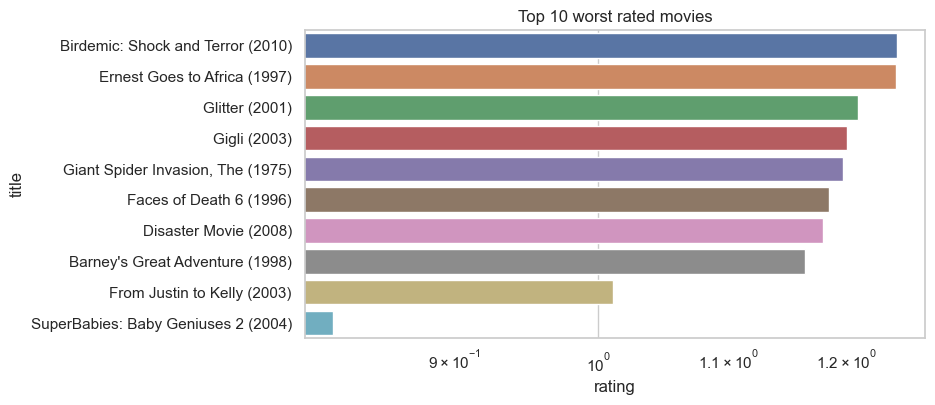

In [39]:
ax = sns.set(style="whitegrid", rc={'figure.figsize':(8, 4)})
ax = sns.barplot(x=copied_train.rating.tail(10), y=copied_train.title.tail(10))
ax.set(xscale="log")
sns.color_palette()
plt.title('Top 10 worst rated movies');

**Rating count by Year interval**     
If we take a look at our visualizations so far, some of these movies were released in the 19th/20th century. Were these movies rated then? Let us find out by visualizing the rating count by year intervals.

In [ ]:
def get_year_intervals():
    century = 0
    decade_1 = 0
    decade_2 = 0
    decade_3 = 0
    decade_4 = 0
    decade_5 = 0
    decade_6 = 0
    decade_7 = 0
    decade_8 = 0
    decade_9 = 0
    decade_10 = 0
    decade_11 = 0
    decade_12 = 0
    decade_13 = 0
    counts = []
    # Create a for loop access every row we can divide the data accordingly.
    for i in range(len(copied_train)) :
        if (copied_train.loc[i,'Year'] >= 1800 and copied_train.loc[i,'Year'] < 1900):
            century = century + 1
        elif (copied_train.loc[i,'Year'] >= 1900 and copied_train.loc[i,'Year'] < 1910):
            decade_1 = decade_1 +1
        elif (copied_train.loc[i,'Year'] >= 1910 and copied_train.loc[i,'Year'] < 1920):
            decade_2 = decade_2 + 1
        elif (copied_train.loc[i,'Year'] >= 1920 and copied_train.loc[i,'Year'] < 1930):
            decade_3 = decade_3 + 1
        elif (copied_train.loc[i,'Year'] >= 1930 and copied_train.loc[i,'Year'] < 1940):
            decade_4 = decade_4 + 1
        elif (copied_train.loc[i,'Year'] >= 1940 and copied_train.loc[i,'Year'] < 1950):
            decade_5 = decade_5 + 1
        elif (copied_train.loc[i,'Year'] >= 1950 and copied_train.loc[i,'Year'] < 1960):
            decade_6 = decade_6 + 1
        elif (copied_train.loc[i,'Year'] >= 1960 and copied_train.loc[i,'Year'] < 1970):
            decade_7 = decade_7 + 1
        elif (copied_train.loc[i,'Year'] >= 1970 and copied_train.loc[i,'Year'] < 1980):
            decade_8 = decade_8 + 1
        elif (copied_train.loc[i,'Year'] >= 1980 and copied_train.loc[i,'Year'] < 1990):
            decade_9 = decade_9 +1
        elif (copied_train.loc[i,'Year'] >= 1990 and copied_train.loc[i,'Year'] < 2000):
            decade_10 = decade_10 +1
        elif (copied_train.loc[i,'Year'] >= 2000 and copied_train.loc[i,'Year'] < 2010):
            decade_11 = decade_11 +1
        elif (copied_train.loc[i,'Year'] >= 2010 and copied_train.loc[i,'Year'] < 2020):
            decade_12 = decade_12 +1
        else:
            decade_13 = decade_13 + 1
    #counts.extend([count1,count11])
    counts.extend([century,decade_1,decade_2,decade_3,decade_4,
                   decade_5,decade_6,decade_7,decade_8,decade_9,
                  decade_10,decade_11,decade_12,decade_13])
    return counts

counts = get_year_intervals()

In [ ]:
year_interval  = ['1800 - 1899',
                  '1900 - 1909',
                  '1910 - 1919',
                  '1920 - 1929',
                  '1930 - 1939',
                  '1940 - 1949',
                  '1950 - 1959',
                  '1960 - 1969',
                  '1970 - 1979',
                  '1980 - 1989',
                  '1990 - 1999',
                  '2000 - 2009',
                  '2010 - 2019',
                  '2020 - present']

counts_dict = {'Decades':year_interval,
                'count':counts}
counts_df = pd.DataFrame(counts_dict)
counts_df 

In [ ]:
# Plotting the graph
fig, ax = plt.subplots(1,2,figsize=(20, 9)) 

# Create a lineplot to visualise the trend per 10 year period
sns.lineplot(ax=ax[0], x='Decades', y='count',data=counts_df)

# Fix x tick labels for readability  
ax[0].set_xticklabels(year_interval,rotation = 20, ha="right")

# Create a barplot to visualise the how many movies were released per 10 year period 
sns.barplot(ax=ax[1], y='Decades', x='count', data=counts_df)
# Labeling the bars on the bar plot
for container in ax[1].containers:
    ax[1].bar_label(container)

# Show the barplot
plt.show()

<br>

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The following will be done at this stage;
- Droping some features from our train_df.
- Extracting a sample from our train_df.
- performing text vectorization (Tf-Idf precisely) on our 'genre' feature.

In [41]:
train_df.head()

,userId,movieId,rating,timestamp,title,genres,date_time,Year,Month,Day of Week
0,5163,57669,4.0,1518349992,In Bruges (2008),comedy crime drama thriller,2018-02-11 12:53:12,2018,2,6
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),comedy,2008-03-23 03:18:59,2008,3,6
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,action comedy sci-fi,2004-02-08 05:45:39,2004,2,6
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),adventure comedy crime,2015-02-04 10:36:05,2015,2,2
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,drama horror mystery thriller,1996-05-29 14:17:17,1996,5,2


In [42]:
# Removing columns in train_df
train_df.drop(columns=['date_time', 'Year', 'Month', 
                       'Day of Week', 'timestamp'], inplace=True)

In [43]:
train_df.shape

(10000038, 5)

In [44]:
gc.collect()

1575

<br>

The size of the dataset on which a model is trained has a huge influence on how well the model performs. The larger the dataset, the more computing power that will be required for training the model.

Due to the constraint posed by the computer power of the local machine on which this model was trained, it was imperative to reduce the size of the dataset.

In [45]:
train_df.head()

,userId,movieId,rating,title,genres
0,5163,57669,4.0,In Bruges (2008),comedy crime drama thriller
1,106343,5,4.5,Father of the Bride Part II (1995),comedy
2,146790,5459,5.0,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,action comedy sci-fi
3,106362,32296,2.0,Miss Congeniality 2: Armed and Fabulous (2005),adventure comedy crime
4,9041,366,3.0,Wes Craven's New Nightmare (Nightmare on Elm S...,drama horror mystery thriller


<br>

### Content-based Filtering

Using `genre` as the basis of the filtering

In [46]:
movies_df

,movieId,title,genres,release_year
0,1,Toy Story (1995),adventure animation children comedy fantasy,1995
1,2,Jumanji (1995),adventure children fantasy,1995
2,3,Grumpier Old Men (1995),comedy romance,1995
3,4,Waiting to Exhale (1995),comedy drama romance,1995
4,5,Father of the Bride Part II (1995),comedy,1995
...,...,...,...,...
62418,209157,We (2018),drama,2018
62419,209159,Window of the Soul (2001),documentary,2001
62420,209163,Bad Poems (2018),comedy drama,2018
62421,209169,A Girl Thing (2001),(no genres listed),2001


In [47]:
# Convienient indexes to map between book titles and indexes of the books dataframe

# maps movies titles to indices
titles = movies_df['title']

# maps indices to movies titles
indices = pd.Series(movies_df.index, index=movies_df['title'])

In [48]:
titles

0                          Toy Story (1995)
1                            Jumanji (1995)
2                   Grumpier Old Men (1995)
3                  Waiting to Exhale (1995)
4        Father of the Bride Part II (1995)
                        ...                
62418                             We (2018)
62419             Window of the Soul (2001)
62420                      Bad Poems (2018)
62421                   A Girl Thing (2001)
62422        Women of Devil's Island (1962)
Name: title, Length: 62423, dtype: object

In [49]:
indices

title
Toy Story (1995)                          0
Jumanji (1995)                            1
Grumpier Old Men (1995)                   2
Waiting to Exhale (1995)                  3
Father of the Bride Part II (1995)        4
                                      ...  
We (2018)                             62418
Window of the Soul (2001)             62419
Bad Poems (2018)                      62420
A Girl Thing (2001)                   62421
Women of Devil's Island (1962)        62422
Length: 62423, dtype: int64

<br>

Due to the capacity of this local machine, We will take a sample from `movies_df`to build our recommendation system. This is to avoid system freezing or crashing while running codes.

### Feature vectorization

This invloves converting the textual features into a format which can be used to compute the relative similarities between one another.

This will allow the translation of string-based collection of `genres` into numerical vectors.
([Here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) is an overview of this process which is very similar to [count-based vectorization](https://youtu.be/W9VtEVBdgnQ)).

In [50]:
data = movies_df['genres'].head(10000)
data.shape

(10000,)

In [51]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0.0, stop_words='english')
data = movies_df['genres'].head(15000)
# Produce a feature matrix, where each row corresponds to a movie,

# with TF-IDF features as columns 
sample_genres_vect = tf.fit_transform(data)

# Uncomment the code below if running on Higher computing power such as AWS EC2 instance
#sample_genres_vect = tf.fit_transform(movies_df['genres'])


sample_genres_vect.shape

(15000, 177)

<br>

**Computing the `similarity` between each vector within our matrix. This is done by making use of the `cosine_similarity` function provided to us by `sklearn`.**

In [52]:
cosine_sim_content = cosine_similarity(sample_genres_vect, sample_genres_vect)

print (cosine_sim_content.shape)

(15000, 15000)


In [53]:
gc.collect()

2

In [54]:
def content_generate_top_N_recommendations(movie_title, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_content[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    movie_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[movie_indices]

In [55]:
content_generate_top_N_recommendations("Toy Story (1995)", N=10)

2203                                           Antz (1998)
3021                                    Toy Story 2 (1999)
3653        Adventures of Rocky and Bullwinkle, The (2000)
3912                      Emperor's New Groove, The (2000)
4780                                 Monsters, Inc. (2001)
9949     DuckTales: The Movie - Treasure of the Lost La...
10773                                     Wild, The (2006)
11604                               Shrek the Third (2007)
12969                       Tale of Despereaux, The (2008)
Name: title, dtype: object

In [56]:
content_generate_top_N_recommendations("Wolf (1994)", N=10)

7414                                   Cat People (1942)
10753                                       Magic (1978)
9283                                  Love Object (2003)
8639             Dracula Has Risen from the Grave (1968)
8327     Unknown, The (a.k.a. Alonzo the Armless) (1927)
8670                        House of Dark Shadows (1970)
10745                  Curse of the Werewolf, The (1961)
11252                            Zombie Honeymoon (2004)
2701               American Werewolf in Paris, An (1997)
Name: title, dtype: object

<br>

#### Rating Prediction

The rating a user _would_ give a movie that they have not watched yet is calculated below

In [57]:
def content_generate_rating_estimate(movie_title, user, rating_data, k=20, threshold=0.0):
    # Convert the book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    neighbors = [] # <-- Stores our collection of similarity values 
     
    # Gather the similarity ratings between each book the user has rated
    # and the reference book 
    for index, row in rating_data[rating_data['userId']==user].iterrows():
        sim = cosine_sim_content[b_idx-1, indices[row['title']]-1]
        neighbors.append((sim, row['rating']))
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scores and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(rating_data[rating_data['title']==movie_title]['rating'])
    return predictedRating

In [58]:
# Subset of ratings from user 1000
train_df[train_df['userId'] == 1000][3:10]

,userId,movieId,rating,title,genres
203626,1000,2144,2.5,Sixteen Candles (1984),comedy romance
283682,1000,1270,3.0,Back to the Future (1985),adventure comedy sci-fi
398450,1000,3203,3.5,Dead Calm (1989),thriller
915819,1000,6936,0.5,Elf (2003),children comedy fantasy
1202145,1000,1302,2.5,Field of Dreams (1989),children drama fantasy
1307188,1000,1464,5.0,Lost Highway (1997),crime drama fantasy film-noir mystery romance
1319900,1000,527,5.0,Schindler's List (1993),drama war


In [59]:
title = "Sixteen Candles (1984)"
actual_rating = train_df[(train_df['userId'] == 1000) & (train_df['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(movie_title=title, user=1000, rating_data=train_df)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - Sixteen Candles (1984)
---
Actual rating: 		 2.5
Predicted rating: 	 3.3501703321316105


In [60]:
title = "Lost Highway (1997)"
actual_rating = train_df[(train_df['userId'] == 1000) & (train_df['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(movie_title=title, user=1000, rating_data=train_df)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - Lost Highway (1997)
---
Actual rating: 		 5.0
Predicted rating: 	 3.7846289829651725


In [2]:
import numpy as np

np.exp(1)

2.718281828459045

In [8]:
a = [1, 2, 3, 4]

b = [4, 5, 6, 7]

for item in zip(b, a):
    print(sum(item))

5
7
9
11


In [15]:
import math

math.log(2)

0.6931471805599453